<a href="https://colab.research.google.com/github/5ditto/AP/blob/main/FasterR_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Faster R-CNN** - Projeto de Aprendizagem Profunda

## **Imports**

In [19]:
import glob as glob
import os
import xml.etree.ElementTree as ET
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## **Escolha do GPU (Tesla T4)**

In [6]:
!nvidia-smi

Sat May 18 18:10:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **Clone do repositório que contém o modelo que vamos utilizar**

In [7]:
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

Cloning into 'fastercnn-pytorch-training-pipeline'...
remote: Enumerating objects: 1337, done.
remote: Counting objects: 100% (434/434), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 1337 (delta 325), reused 320 (delta 284), pack-reused 903
Receiving objects: 100% (1337/1337), 12.82 MiB | 26.20 MiB/s, done.
Resolving deltas: 100% (907/907), done.


In [8]:
cd fastercnn-pytorch-training-pipeline

/content/fastercnn-pytorch-training-pipeline


## **Instalar packages**

In [9]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 55.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 15.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py

In [10]:
cd data

/content/fastercnn-pytorch-training-pipeline/data


## **Download do Dataset**

In [11]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="73iRe6Yh6q25pN4arNF2")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(14)
dataset = version.download("voc")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Rock-Paper-Scissors-SXSW-14 in voc:: 100%|██████████| 14675/14675 [00:02<00:00, 6882.71it/s]


## **Organizar o dataset e tratar do YAML**

In [12]:
import os
import shutil

def organize_files(base_path):
    folders = ['train', 'test', 'valid']
    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        if not os.path.exists(folder_path):
            print(f"A pasta {folder_path} não existe.")
            continue

        jpg_folder = os.path.join(folder_path, 'jpg')
        xml_folder = os.path.join(folder_path, 'xml')

        os.makedirs(jpg_folder, exist_ok=True)
        os.makedirs(xml_folder, exist_ok=True)

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            if os.path.isfile(file_path):
                if file_name.endswith('.jpg'):
                    shutil.move(file_path, os.path.join(jpg_folder, file_name))
                elif file_name.endswith('.xml'):
                    shutil.move(file_path, os.path.join(xml_folder, file_name))

        print(f"Arquivos na pasta {folder} foram organizados.")

base_path = '/content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14'
organize_files(base_path)

Arquivos na pasta train foram organizados.
Arquivos na pasta test foram organizados.
Arquivos na pasta valid foram organizados.


In [13]:
%%writefile /content/fastercnn-pytorch-training-pipeline/data_configs/rock-paper-scissors.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: /content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/train/jpg
TRAIN_DIR_LABELS: /content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/train/xml
VALID_DIR_IMAGES: /content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/valid/jpg
VALID_DIR_LABELS: /content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/valid/xml

# Class names.
CLASSES: [
    '__background__',
    'Paper',
    'Rock',
    'Scissors'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 4

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing /content/fastercnn-pytorch-training-pipeline/data_configs/rock-paper-scissors.yaml


## **Exploração do Dataset**

## **Labels e Quantidade de Imagens para Treino, Teste e Validação**

In [20]:
def count_images_and_classes(data_dirs):
    images_classes_count = {}

    for data_set, dir_path in data_dirs.items():
        images_count = 0
        classes_set = set()
        for xml_file in os.listdir(dir_path):
            if xml_file.endswith('.xml'):
                tree = ET.parse(os.path.join(dir_path, xml_file))
                root = tree.getroot()
                objects = root.findall('object')
                images_count += 1
                for obj in objects:
                    class_name = obj.find('name').text
                    classes_set.add(class_name)
        images_classes_count[data_set] = {'images_count': images_count, 'classes': classes_set}

    return images_classes_count

data_dirs = {
    'train': '/content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/train/xml',
    'test': '/content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/test/xml',
    'valid': '/content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/valid/xml'
}

images_classes_count = count_images_and_classes(data_dirs)

for data_set, info in images_classes_count.items():
    print(f"{data_set.capitalize()} set: Images: {info['images_count']}, Classes: {info['classes']}")

Train set: Images: 6455, Classes: {'Scissors', 'Paper', 'Rock'}
Test set: Images: 304, Classes: {'Scissors', 'Paper', 'Rock'}
Valid set: Images: 576, Classes: {'Scissors', 'Paper', 'Rock'}


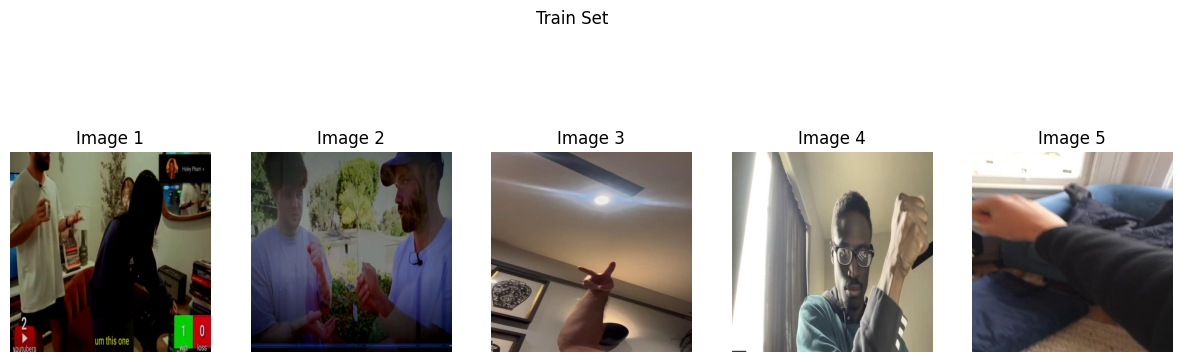

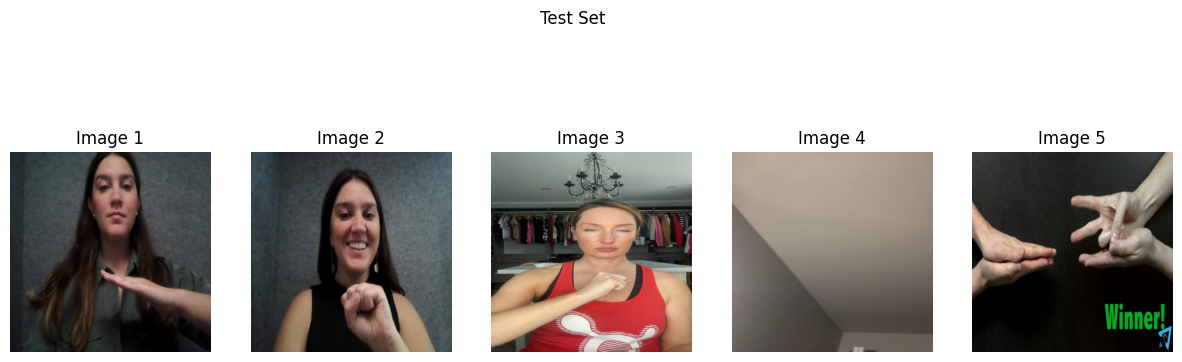

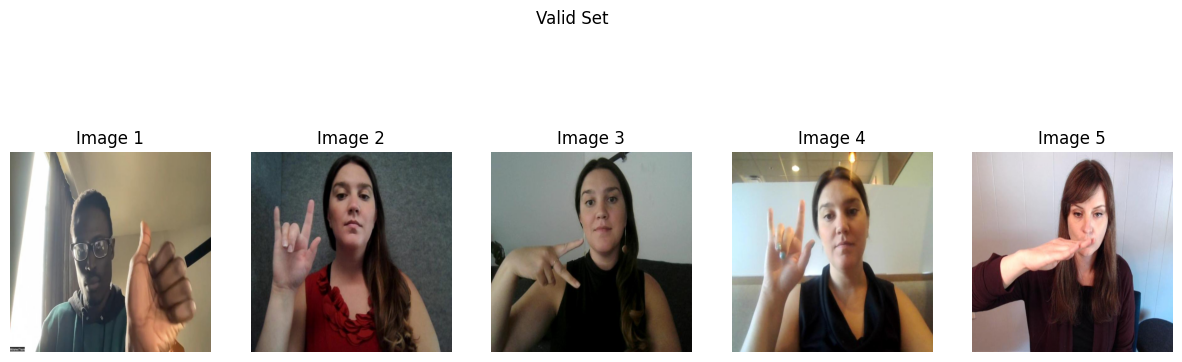

In [22]:
def show_images(data_dirs, num_images=5):
    for data_set, dir_path in data_dirs.items():
        images_shown = 0
        fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
        fig.suptitle(f"{data_set.capitalize()} Set")
        for img_file in os.listdir(dir_path):
            if img_file.endswith('.jpg') and images_shown < num_images:
                img_path = os.path.join(dir_path, img_file)
                image = mpimg.imread(img_path)
                axs[images_shown].imshow(image)
                axs[images_shown].set_title(f"Image {images_shown + 1}")
                axs[images_shown].axis('off')
                images_shown += 1
        plt.show()

data_dirs = {
    'train': '/content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/train/jpg',
    'test': '/content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/test/jpg',
    'valid': '/content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/valid/jpg'
}

show_images(data_dirs, num_images=5)

## **Verificar se todas as imagens tem label associada**

In [27]:
def check_labels_presence(data_dirs):
    for data_set, jpg_dir in data_dirs.items():
        xml_dir = os.path.join(jpg_dir.replace('jpg', 'xml'))
        num_images = 0
        num_missing_labels = 0
        for img_file in os.listdir(jpg_dir):
            if img_file.endswith('.jpg'):
                num_images += 1
                xml_file = img_file.replace('.jpg', '.xml')
                if not os.path.exists(os.path.join(xml_dir, xml_file)):
                    num_missing_labels += 1
        if num_missing_labels == 0:
            print(f"Todas {num_images} imagens em {data_set} tem label correspondente.")
        else:
            print(f"Estão labels em falta")

data_dirs = {
    'train': '/content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/train/jpg',
    'test': '/content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/test/jpg',
    'valid': '/content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/valid/jpg'
}

check_labels_presence(data_dirs)

Todas 6455 imagens em train tem label correspondente.
Todas 304 imagens em test tem label correspondente.
Todas 576 imagens em valid tem label correspondente.


## **Verificar o número de labels vazias**

In [14]:
def count_empty_labels(data_dirs):
    empty_labels_count = {}

    for data_set, dir_path in data_dirs.items():
        empty_count = 0
        for xml_file in os.listdir(dir_path):
            if xml_file.endswith('.xml'):
                tree = ET.parse(os.path.join(dir_path, xml_file))
                root = tree.getroot()
                objects = root.findall('object')
                if not objects:
                    empty_count += 1
        empty_labels_count[data_set] = empty_count

    return empty_labels_count

data_dirs = {
    'train': '/content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/train/xml',
    'test': '/content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/test/xml',
    'valid': '/content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/valid/xml'
}

empty_labels_count = count_empty_labels(data_dirs)

for data_set, empty_count in empty_labels_count.items():
    print(f"{data_set.capitalize()} set: Empty labels: {empty_count}")

Train set: Empty labels: 2516
Test set: Empty labels: 118
Valid set: Empty labels: 238


## **Balanceamento do dataset**

Train set:
  Rock: 1924
  Paper: 1349
  Scissors: 1337


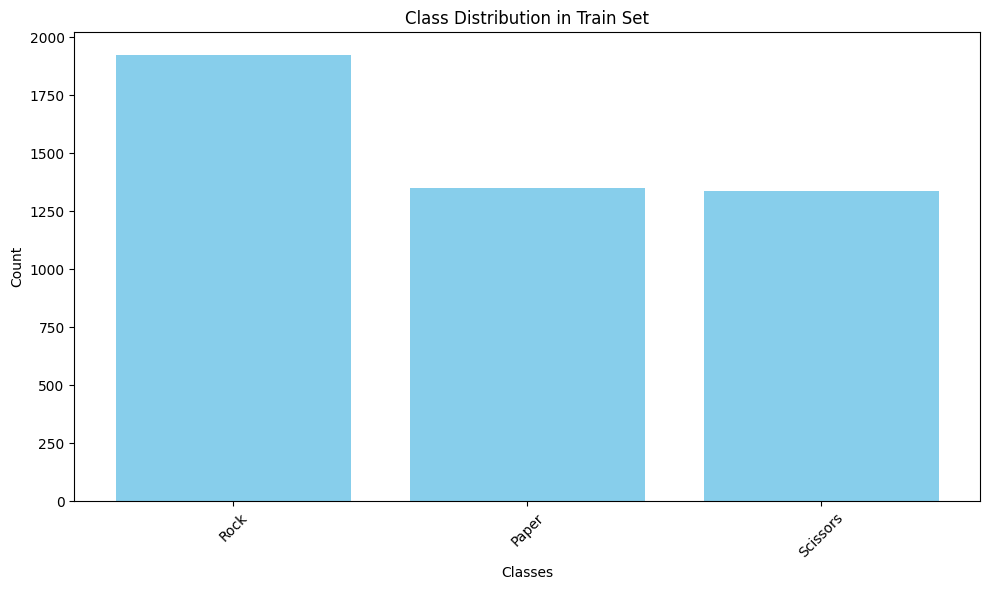

Test set:
  Rock: 65
  Paper: 72
  Scissors: 67


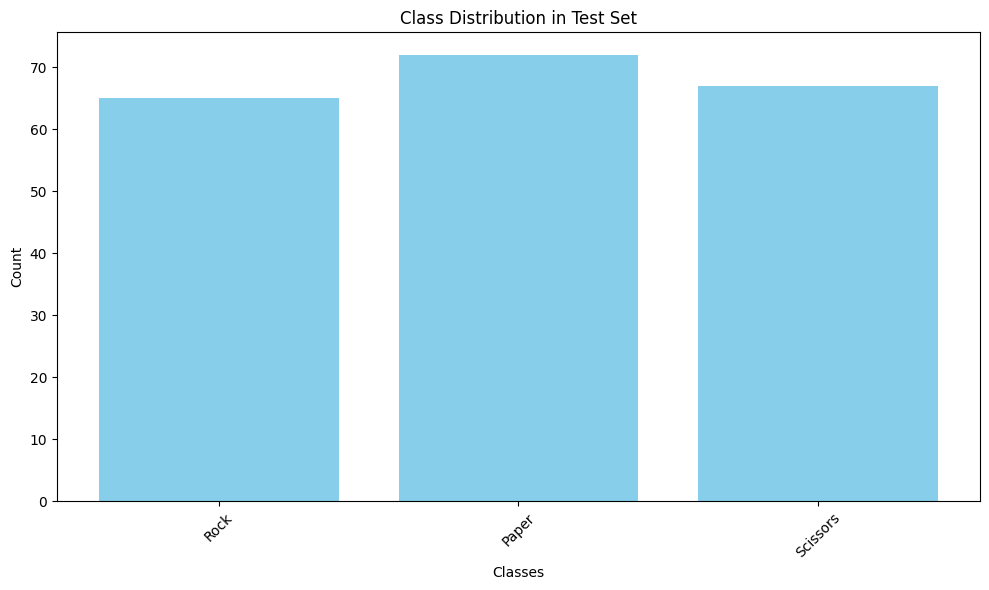

Valid set:
  Paper: 139
  Rock: 141
  Scissors: 120


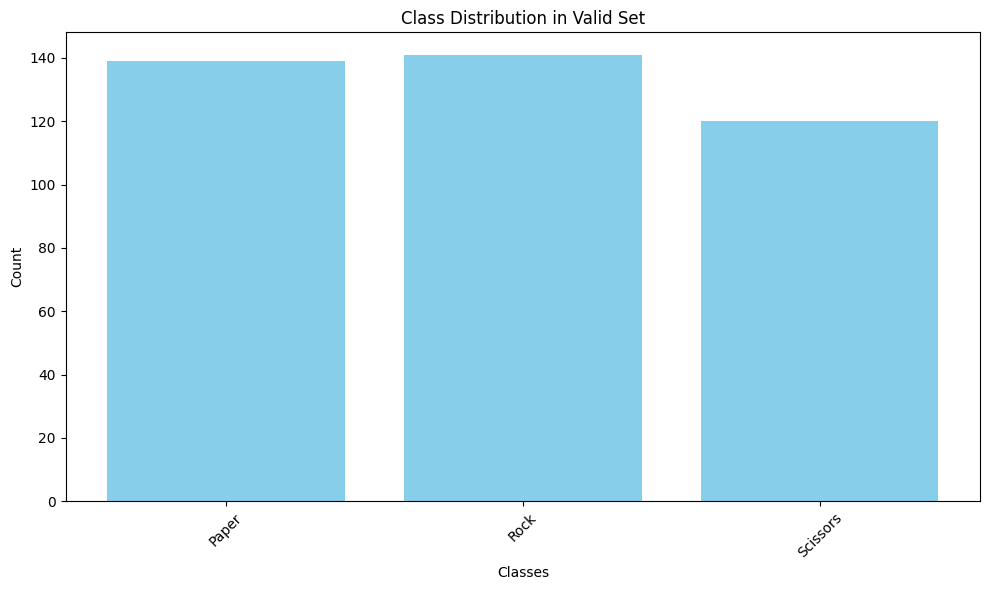

In [28]:
def count_classes_in_sets(data_dirs):
    set_counts = {}

    for data_set, dir_path in data_dirs.items():
        class_count = defaultdict(int)
        for xml_file in os.listdir(dir_path):
            if xml_file.endswith('.xml'):
                tree = ET.parse(os.path.join(dir_path, xml_file))
                root = tree.getroot()
                for obj in root.findall('object'):
                    class_name = obj.find('name').text
                    class_count[class_name] += 1
        set_counts[data_set] = dict(class_count)

    return set_counts

def plot_class_distribution(class_counts, data_set):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.title(f'Class Distribution in {data_set.capitalize()} Set')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{data_set}_class_distribution.png')
    plt.show()

data_dirs = {
    'train': '/content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/train/xml',
    'test': '/content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/test/xml',
    'valid': '/content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/valid/xml'
}

class_counts = count_classes_in_sets(data_dirs)
for data_set, counts in class_counts.items():
    print(f"{data_set.capitalize()} set:")
    for class_name, count in counts.items():
        print(f"  {class_name}: {count}")
    plot_class_distribution(counts, data_set)



## **Treinar o modelo**

In [29]:
cd ..

/content/fastercnn-pytorch-training-pipeline


In [30]:
ls

_config.yml    eval.py             __init__.py              onnx_inference_video.py  train.py
data/          example_test_data/  LICENSE                  readme_images/           utils/
data_configs/  export.py           models/                  README.md
datasets.py    inference.py        notebook_examples/       requirements.txt
docs/          inference_video.py  onnx_inference_image.py  torch_utils/


In [32]:
!python train.py --data data_configs/rock-paper-scissors.yaml --epochs 1 --model fasterrcnn_resnet50_fpn --name rock-paper-scissors --batch 16

2024-05-18 18:44:34.647091: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 18:44:34.647136: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 18:44:34.648527: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-18 18:44:35.653599: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Not using distributed mode
wandb: Currently logged in as: a96897 (165grinch). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.17.0
wandb: Run data is saved locally in /content/fastercnn-pytorch-training-

## **Avaliar Modelo**

In [ ]:
!python eval.py --weights outputs/training/rock-paper-scissors/best_model.pth --data data_configs/rock-paper-scissors.yaml --model fasterrcnn_resnet50_fpn --verbose

2024-05-18 16:16:07.778231: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 16:16:07.778281: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 16:16:07.779905: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-18 16:16:08.906068: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Checking Labels and images...
100% 576/576 [00:00<00:00, 155705.02it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max numbe

## **Usar o Modelo**

In [ ]:
!python inference.py --input /content/fastercnn-pytorch-training-pipeline/data/Rock-Paper-Scissors-SXSW-14/test --weights /content/fastercnn-pytorch-training-pipeline/outputs/training/rock-paper-scissors/last_model_state.pth

2024-05-18 17:00:55.696707: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 17:00:55.696755: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 17:00:55.698191: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-18 17:00:56.743278: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Building from model name arguments...
Test instances: 0
TEST PREDICTIONS COMPLETE
Erro ao fechar as janelas: OpenCV(4.8.0) /io/opencv/modules/highgui/src/window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild

## **Visualizar Resultados da Validação**

/content/fastercnn-pytorch-training-pipeline/outputs/training/rock-paper-scissors/image_10_1.jpg


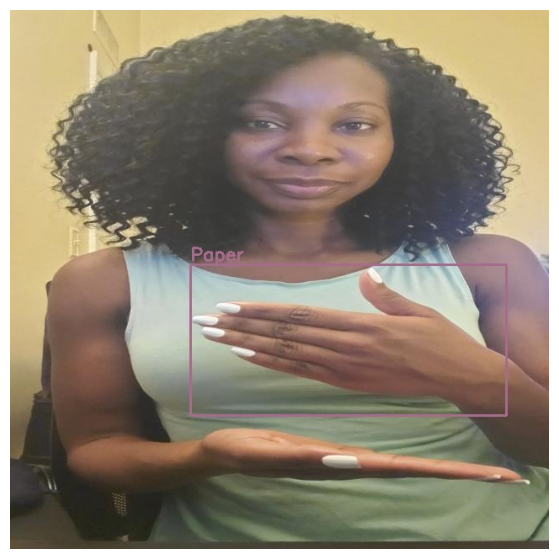

/content/fastercnn-pytorch-training-pipeline/outputs/training/rock-paper-scissors/image_1_1.jpg


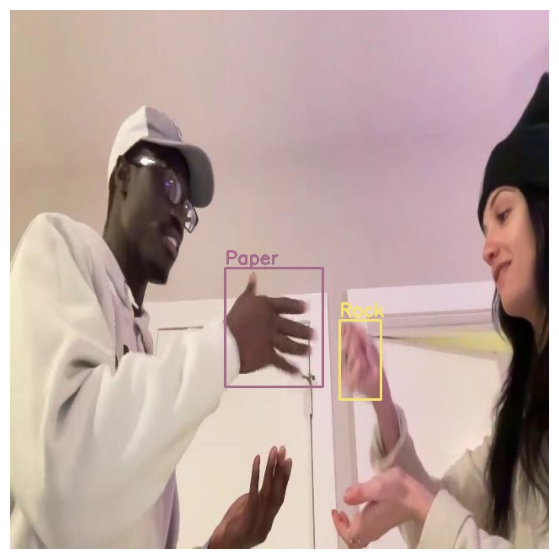

/content/fastercnn-pytorch-training-pipeline/outputs/training/rock-paper-scissors/image_13_1.jpg


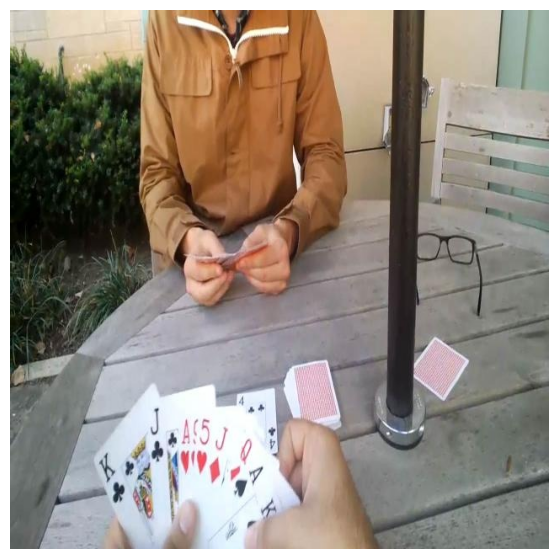

/content/fastercnn-pytorch-training-pipeline/outputs/training/rock-paper-scissors/image_11_1.jpg


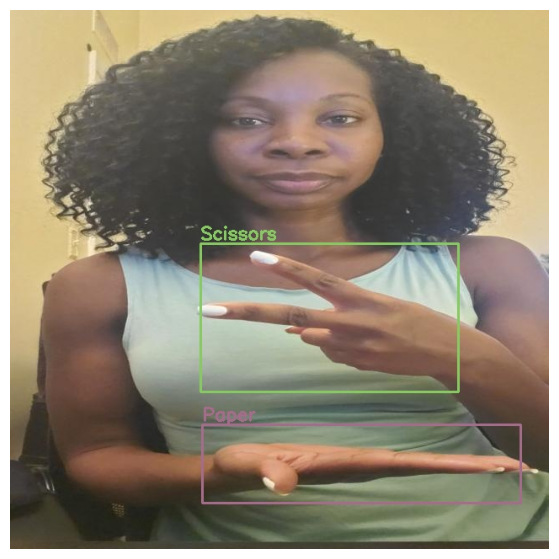

/content/fastercnn-pytorch-training-pipeline/outputs/training/rock-paper-scissors/image_6_1.jpg


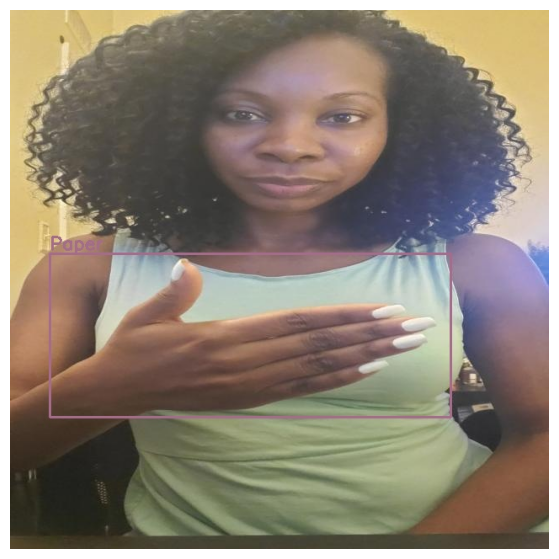

/content/fastercnn-pytorch-training-pipeline/outputs/training/rock-paper-scissors/image_15_1.jpg


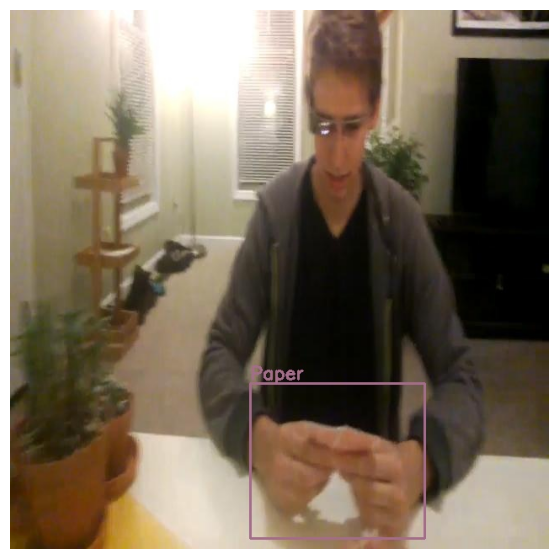

/content/fastercnn-pytorch-training-pipeline/outputs/training/rock-paper-scissors/image_7_1.jpg


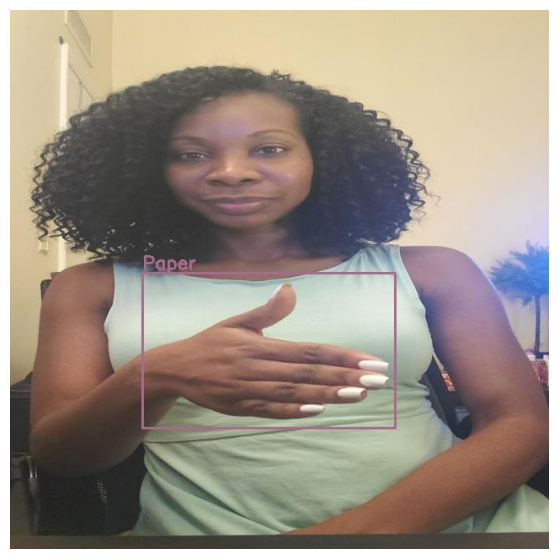

/content/fastercnn-pytorch-training-pipeline/outputs/training/rock-paper-scissors/image_14_1.jpg


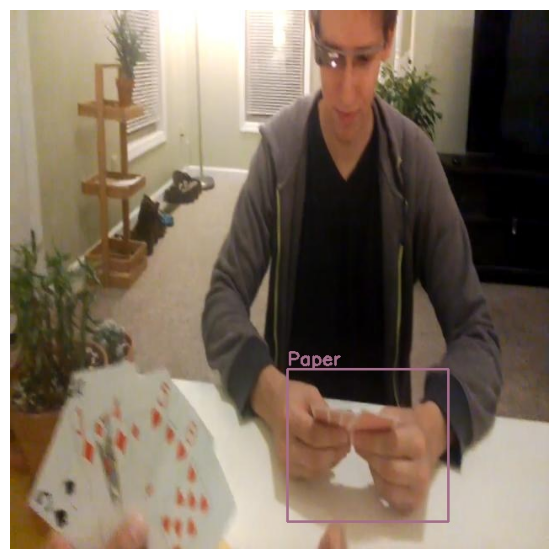

/content/fastercnn-pytorch-training-pipeline/outputs/training/rock-paper-scissors/image_4_1.jpg


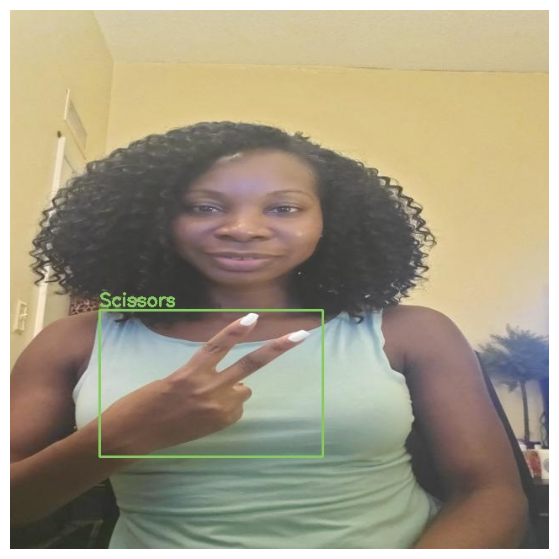

/content/fastercnn-pytorch-training-pipeline/outputs/training/rock-paper-scissors/image_2_1.jpg


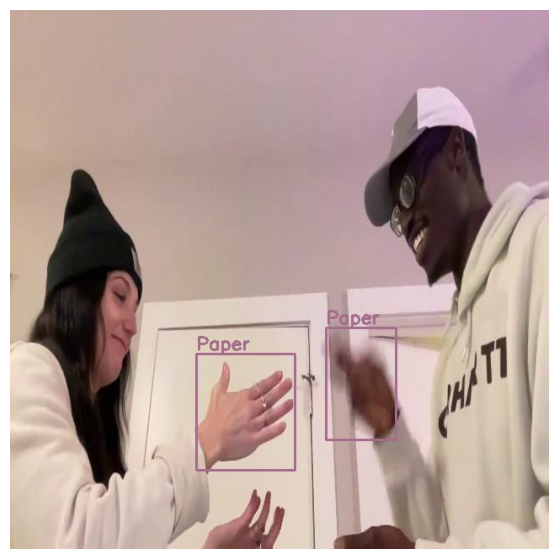

In [ ]:
results_dir_path = '/content/fastercnn-pytorch-training-pipeline/outputs/training/rock-paper-scissors'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(10):
    plt.figure(figsize=(10, 7))
    print(valid_images[i])
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()